## Telecom Churn: Logistic Regression with PCA

we need to predict whether a particular customer will switch to another telecom provider or not. 
In telecom terminology, customer attrition is referred to as 'churn'.
   * In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
   * For many incumbent operators, retaining high profitable customers is the number one business goal.
   * To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


   * Submitted by:
      1. Murali Divya Teja Gummadidala
      2. Rajesh Sikdar

### Importing the Data and checking for nulls

In [138]:
#importing the Numpy and Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
#Reading the values from csv file
original_df = pd.read_csv('telecom_churn_data.csv')
original_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [141]:
#Finding the shape of the original dataframe
original_df.shape

(99999, 226)

In [142]:
original_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [143]:
# Getting the columns
original_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [144]:
# getting info of the original_df
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [145]:
original_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [146]:
# getting the number of nulls in the dataframe
original_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [147]:
# getting null in percentage 
round(100*(original_df.isnull().sum())/len(original_df),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [148]:
# getting the columns which has null values

null_col = list(original_df[original_df.columns[original_df.isnull().any()]].columns)
null_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

In [149]:
# original_df[original_df.columns[original_df.isnull().any()]]
null_dict = dict(round(100*(original_df.isnull().sum())/len(original_df),2))
null_dict

{'mobile_number': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.02,
 'std_og_t2o_mou': 1.02,
 'loc_ic_t2o_mou': 1.02,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.6,
 'last_date_of_month_8': 1.1,
 'last_date_of_month_9': 1.66,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'arpu_9': 0.0,
 'onnet_mou_6': 3.94,
 'onnet_mou_7': 3.86,
 'onnet_mou_8': 5.38,
 'onnet_mou_9': 7.75,
 'offnet_mou_6': 3.94,
 'offnet_mou_7': 3.86,
 'offnet_mou_8': 5.38,
 'offnet_mou_9': 7.75,
 'roam_ic_mou_6': 3.94,
 'roam_ic_mou_7': 3.86,
 'roam_ic_mou_8': 5.38,
 'roam_ic_mou_9': 7.75,
 'roam_og_mou_6': 3.94,
 'roam_og_mou_7': 3.86,
 'roam_og_mou_8': 5.38,
 'roam_og_mou_9': 7.75,
 'loc_og_t2t_mou_6': 3.94,
 'loc_og_t2t_mou_7': 3.86,
 'loc_og_t2t_mou_8': 5.38,
 'loc_og_t2t_mou_9': 7.75,
 'loc_og_t2m_mou_6': 3.94,
 'loc_og_t2m_mou_7': 3.86,
 'loc_og_t2m_mou_8': 5.38,
 'loc_og_t2m_mou_9': 7.75,
 'loc_og_t2f_mou_6': 3.94,
 'loc_og_t2f_mou_7': 3.86,
 'loc_og_t2f_mou_8': 5.38,
 'loc_og_t2f_mou_9': 7.75,
 '

# Data Preparation and Cleaning

 From the data given the mobilenumber is Unique and cicle id is having 109 which will be acts like id variables. we need to seperate categorical,numerical and id variables

In [150]:
# create column name list by types of columns
id_col = ['mobile_number', 'circle_id']

date_col = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_col =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_col = [column for column in original_df.columns if column not in id_col + date_col + cat_col]


In [151]:
num_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [152]:
# print the number of columns in each list
print(" ID columns: %d\n Date columns:%d\n Numeric columns:%d\n Category columns:%d" % (len(id_col), len(date_col), len(num_col), len(cat_col)))

# check if we have missed any column or not
print(len(id_col) + len(date_col) + len(num_col) + len(cat_col) == original_df.shape[1])

 ID columns: 2
 Date columns:12
 Numeric columns:204
 Category columns:8
True


# Handling the Missing Values

In [153]:
# % of null values in the given dataset
round(100*(original_df.isnull().sum()/original_df.shape[0]),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [154]:
#getting the columns which are greater than 70%
columns_missing_data = round(100*(original_df.isnull().sum()/original_df.shape[0]),2)
columns_missing_data[columns_missing_data>= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

# Imputing Missing Values

## Imputing the zeros 

In [155]:
# Imputing the values for recharge columns by describinhg values
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
original_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [156]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
original_df.loc[original_df.total_rech_data_6.isnull() & original_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN



In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month

In [157]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [158]:
# impute missing values with 0
original_df[zero_impute] = original_df[zero_impute].apply(lambda x: x.fillna(0))

In [159]:
# now, let's make sure values are imputed correctly
print(original_df[zero_impute].isnull().sum()*100/original_df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


## Replacing the NaN in by Unknown Category with a value '-1' in it

In [160]:
original_df[cat_col] = original_df[cat_col].apply(lambda x:x.fillna(-1))

In [161]:
# Missing values % for the category columns
round(100*(original_df[cat_col].isnull().sum()/original_df.shape[0]),2)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

## Dropping the id and date columns

In [162]:
# Dropping the id and dates column as below it is not contiributing any thing 
original_df1 = original_df.drop(id_col+date_col,axis=1)
original_df1.shape

(99999, 212)

In [163]:
#getting the columns which are greater than 70%
columns_missing_data1 = round(100*(original_df1.isnull().sum()/original_df1.shape[0]),2)
columns_missing_data1[columns_missing_data1>= 70]

count_rech_2g_6    74.85
count_rech_2g_7    74.43
count_rech_2g_8    73.66
count_rech_2g_9    74.08
count_rech_3g_6    74.85
count_rech_3g_7    74.43
count_rech_3g_8    73.66
count_rech_3g_9    74.08
arpu_3g_6          74.85
arpu_3g_7          74.43
arpu_3g_8          73.66
arpu_3g_9          74.08
arpu_2g_6          74.85
arpu_2g_7          74.43
arpu_2g_8          73.66
arpu_2g_9          74.08
dtype: float64

In [164]:
# Dropping the columns which are more than 70% missing values 
dropping_col  = columns_missing_data1[columns_missing_data1>= 70].index
dropping_col

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [165]:
original_df1 = original_df1.drop(dropping_col,axis=1)
original_df1.shape

(99999, 196)

## Imputing the missing values for remaing columns

In [166]:
#getting the columns which are greater than 70%
columns_missing_data2 = original_df1.isnull().sum()
columns_missing_data2[columns_missing_data2>0]

loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
onnet_mou_6       3937
onnet_mou_7       3859
                  ... 
isd_ic_mou_9      7745
ic_others_6       3937
ic_others_7       3859
ic_others_8       5378
ic_others_9       7745
Length: 119, dtype: int64

In [167]:
# Impute columns for the remaing columns
imputed_col = columns_missing_data2[columns_missing_data2>0].index
original_df1[imputed_col].info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 119 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loc_og_t2o_mou    float64
 1   std_og_t2o_mou    float64
 2   loc_ic_t2o_mou    float64
 3   onnet_mou_6       float64
 4   onnet_mou_7       float64
 5   onnet_mou_8       float64
 6   onnet_mou_9       float64
 7   offnet_mou_6      float64
 8   offnet_mou_7      float64
 9   offnet_mou_8      float64
 10  offnet_mou_9      float64
 11  roam_ic_mou_6     float64
 12  roam_ic_mou_7     float64
 13  roam_ic_mou_8     float64
 14  roam_ic_mou_9     float64
 15  roam_og_mou_6     float64
 16  roam_og_mou_7     float64
 17  roam_og_mou_8     float64
 18  roam_og_mou_9     float64
 19  loc_og_t2t_mou_6  float64
 20  loc_og_t2t_mou_7  float64
 21  loc_og_t2t_mou_8  float64
 22  loc_og_t2t_mou_9  float64
 23  loc_og_t2m_mou_6  float64
 24  loc_og_t2m_mou_7  float64
 25  loc_og_t2m_mou_8  float64
 26  loc_og_t2m_mou_9 

In [168]:
#imputing with the median values of the columns
original_df2 = original_df1.copy()
for col in imputed_col:
    original_df2[col].fillna((original_df2[col].median()),inplace=True)

In [169]:
#Checking for the null values in the dataframe
original_df2.isnull().sum()/original_df2.shape[0]

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64

# filter high-value customers

## computing the recharge amount going through Good Phase

In [170]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
original_df2['total_data_rech_6'] = original_df2['total_rech_data_6']*original_df2['av_rech_amt_data_6']
original_df2['total_data_rech_7'] = original_df2['total_rech_data_7']*original_df2['av_rech_amt_data_7']

In [171]:
# calculate teh total recharge amount for June and July ---> call recharge amount + data recharge amounta
original_df2['amt_data_6'] =  original_df2['total_rech_amt_6']+original_df2['total_data_rech_6']
original_df2['amt_data_7'] =  original_df2['total_rech_amt_7']+original_df2['total_data_rech_7']

In [172]:
# calculate average recharge done by customer in June and July
original_df2['av_amt_data_6_7'] = (original_df2['amt_data_6']+original_df2['amt_data_7'])/2

In [173]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(original_df2.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [174]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
original_df2_filtered = original_df2.loc[original_df2.av_amt_data_6_7 >= original_df2.av_amt_data_6_7.quantile(0.7), :]
original_df2_filtered = original_df2_filtered.reset_index(drop=True)
original_df2_filtered.shape

(30001, 201)

In [175]:
# remove the variable  which used to find the high-value customers
original_df2_filtered = original_df2_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
original_df2_filtered.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

## Churn Defining from Month 9

In [176]:
# calculate total incoming and outgoing minutes of usage
original_df2_filtered['total_calls_mou_9'] = original_df2_filtered.total_ic_mou_9 + original_df2_filtered.total_og_mou_9

In [177]:
# calculate 2g and 3g data consumption
original_df2_filtered['total_internet_mb_9'] =  original_df2_filtered.vol_2g_mb_9 + original_df2_filtered.vol_3g_mb_9

In [178]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
original_df2_filtered['churn'] = original_df2_filtered.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

In [179]:
# number of churns in the data frame
original_df2_filtered['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [180]:
# % of churn in the dataframe 
100*(original_df2_filtered['churn'].value_counts()/original_df2_filtered.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64

from the given dataframe we can see that the churn ratio is equal to 8% 

In [181]:
# change data type to category
original_df2_filtered.churn = original_df2_filtered.churn.astype("category")

In [182]:
# drop the columns 'total_internet_mb_9', 'total_calls_mou_9'
original_df2_filtered = original_df2_filtered.drop(['total_internet_mb_9','total_calls_mou_9'],axis=1)
original_df2_filtered.shape

(30001, 197)

# Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [183]:
original_df2_filtered['arpu_diff'] = original_df2_filtered.arpu_8 - ((original_df2_filtered.arpu_6 + original_df2_filtered.arpu_7)/2)

original_df2_filtered['onnet_mou_diff'] = original_df2_filtered.onnet_mou_8 - ((original_df2_filtered.onnet_mou_6 + original_df2_filtered.onnet_mou_7)/2)

original_df2_filtered['offnet_mou_diff'] = original_df2_filtered.offnet_mou_8 - ((original_df2_filtered.offnet_mou_6 + original_df2_filtered.offnet_mou_7)/2)

original_df2_filtered['roam_ic_mou_diff'] = original_df2_filtered.roam_ic_mou_8 - ((original_df2_filtered.roam_ic_mou_6 + original_df2_filtered.roam_ic_mou_7)/2)

original_df2_filtered['roam_og_mou_diff'] = original_df2_filtered.roam_og_mou_8 - ((original_df2_filtered.roam_og_mou_6 + original_df2_filtered.roam_og_mou_7)/2)

original_df2_filtered['loc_og_mou_diff'] = original_df2_filtered.loc_og_mou_8 - ((original_df2_filtered.loc_og_mou_6 + original_df2_filtered.loc_og_mou_7)/2)

original_df2_filtered['std_og_mou_diff'] = original_df2_filtered.std_og_mou_8 - ((original_df2_filtered.std_og_mou_6 + original_df2_filtered.std_og_mou_7)/2)

original_df2_filtered['isd_og_mou_diff'] = original_df2_filtered.isd_og_mou_8 - ((original_df2_filtered.isd_og_mou_6 + original_df2_filtered.isd_og_mou_7)/2)

original_df2_filtered['spl_og_mou_diff'] = original_df2_filtered.spl_og_mou_8 - ((original_df2_filtered.spl_og_mou_6 + original_df2_filtered.spl_og_mou_7)/2)

original_df2_filtered['total_og_mou_diff'] = original_df2_filtered.total_og_mou_8 - ((original_df2_filtered.total_og_mou_6 + original_df2_filtered.total_og_mou_7)/2)

original_df2_filtered['loc_ic_mou_diff'] = original_df2_filtered.loc_ic_mou_8 - ((original_df2_filtered.loc_ic_mou_6 + original_df2_filtered.loc_ic_mou_7)/2)

original_df2_filtered['std_ic_mou_diff'] = original_df2_filtered.std_ic_mou_8 - ((original_df2_filtered.std_ic_mou_6 + original_df2_filtered.std_ic_mou_7)/2)

original_df2_filtered['isd_ic_mou_diff'] = original_df2_filtered.isd_ic_mou_8 - ((original_df2_filtered.isd_ic_mou_6 + original_df2_filtered.isd_ic_mou_7)/2)

original_df2_filtered['spl_ic_mou_diff'] = original_df2_filtered.spl_ic_mou_8 - ((original_df2_filtered.spl_ic_mou_6 + original_df2_filtered.spl_ic_mou_7)/2)

original_df2_filtered['total_ic_mou_diff'] = original_df2_filtered.total_ic_mou_8 - ((original_df2_filtered.total_ic_mou_6 + original_df2_filtered.total_ic_mou_7)/2)

original_df2_filtered['total_rech_num_diff'] = original_df2_filtered.total_rech_num_8 - ((original_df2_filtered.total_rech_num_6 + original_df2_filtered.total_rech_num_7)/2)

original_df2_filtered['total_rech_amt_diff'] = original_df2_filtered.total_rech_amt_8 - ((original_df2_filtered.total_rech_amt_6 + original_df2_filtered.total_rech_amt_7)/2)

original_df2_filtered['max_rech_amt_diff'] = original_df2_filtered.max_rech_amt_8 - ((original_df2_filtered.max_rech_amt_6 + original_df2_filtered.max_rech_amt_7)/2)

original_df2_filtered['total_rech_data_diff'] = original_df2_filtered.total_rech_data_8 - ((original_df2_filtered.total_rech_data_6 + original_df2_filtered.total_rech_data_7)/2)

original_df2_filtered['max_rech_data_diff'] = original_df2_filtered.max_rech_data_8 - ((original_df2_filtered.max_rech_data_6 + original_df2_filtered.max_rech_data_7)/2)

original_df2_filtered['av_rech_amt_data_diff'] = original_df2_filtered.av_rech_amt_data_8 - ((original_df2_filtered.av_rech_amt_data_6 + original_df2_filtered.av_rech_amt_data_7)/2)

original_df2_filtered['vol_2g_mb_diff'] = original_df2_filtered.vol_2g_mb_8 - ((original_df2_filtered.vol_2g_mb_6 + original_df2_filtered.vol_2g_mb_7)/2)

original_df2_filtered['vol_3g_mb_diff'] = original_df2_filtered.vol_3g_mb_8 - ((original_df2_filtered.vol_3g_mb_6 + original_df2_filtered.vol_3g_mb_7)/2)

In [184]:
#Delete the columns with related to 9th month 
original_df2_filtered = original_df2_filtered.filter(regex='[^9]$', axis=1)
original_df2_filtered.shape

(30001, 173)

In [185]:
# extract all names that end with 9
col_9_names = original_df2.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_col if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in original_df2_filtered.columns if col not in cat_cols]

# EDA and Visualization

In [186]:
# change columns types
original_df2_filtered[num_cols] = original_df2_filtered[num_cols].apply(pd.to_numeric)
original_df2_filtered[cat_cols] = original_df2_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [187]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


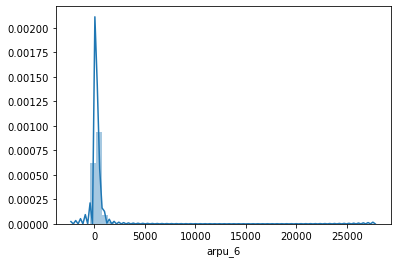

In [188]:
univariate(original_df2.arpu_6)

count    99999.000000
mean       127.604651
std        301.385516
min          0.000000
25%          7.410000
50%         32.360000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


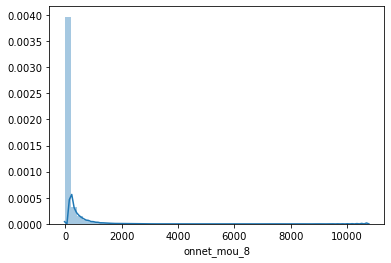

In [189]:
univariate(original_df2.onnet_mou_8)

count    99999.000000
mean       182.356135
std        308.012127
min          0.000000
25%         31.230000
50%         87.290000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


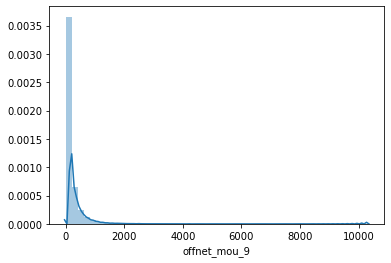

In [190]:
univariate(original_df2.offnet_mou_9)

Variables are very __skewed towards the left__

## Bivariate plot for EDA

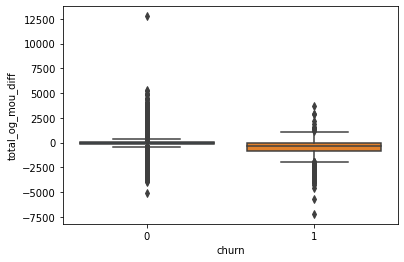

In [191]:
bivariate(original_df2_filtered.churn,original_df2_filtered.total_og_mou_diff)

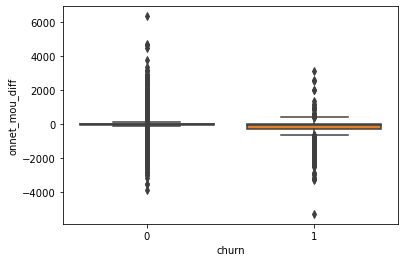

In [192]:
bivariate(original_df2_filtered.churn,original_df2_filtered.onnet_mou_diff)

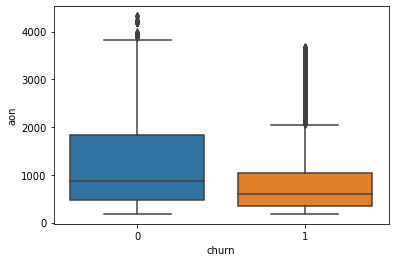

In [193]:
bivariate(original_df2_filtered.churn,original_df2_filtered.aon)

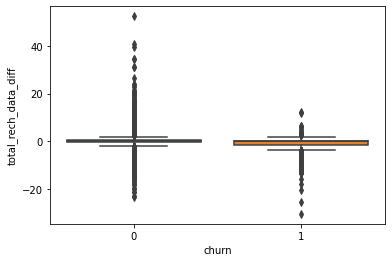

In [194]:
bivariate(original_df2_filtered.churn,original_df2_filtered.total_rech_data_diff)

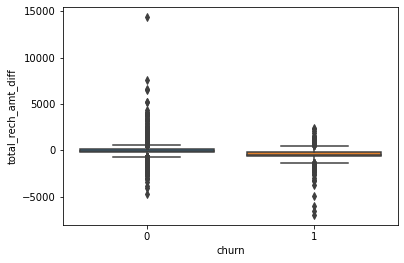

In [195]:
bivariate(original_df2_filtered.churn,original_df2_filtered.total_rech_amt_diff)

# Outerlier Treatment 

In [196]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [197]:
# cap outliers in the numeric columns
original_df2_filtered[num_cols] = original_df2_filtered[num_cols].apply(outliers, axis=0)

# Modelling

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Preprocessing data 

In [199]:

# change churn to numeric
original_df2_filtered['churn'] = pd.to_numeric(original_df2_filtered['churn'])

In [200]:
# Train test split of data frame
X= original_df2_filtered.drop(['churn'],axis=1)
y = original_df2_filtered['churn']


In [201]:
# Spliting the data using tarin_test_split and keep chruns number same in test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 4, stratify = y)

In [202]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(21000, 172) (9001, 172) (21000,) (9001,)


In [203]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

## Scaling  the data variables 

In [204]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
28122,0.0,0.0,0.0,741.399,1381.259,707.000,106.56,118.03,25.44,396.89,...,0.000,-242.565,-2.5,-322.0,-150.0,2.0,152.0,304.0,6.730,125.710
22066,0.0,0.0,0.0,195.337,170.358,238.434,4.23,5.34,5.48,47.93,...,-0.090,99.995,-1.0,74.0,-1.0,0.5,-1.0,75.0,-183.005,321.215
10150,0.0,0.0,0.0,244.492,231.034,141.514,0.00,0.00,0.00,53.03,...,0.200,12.820,0.5,-111.5,-66.0,3.5,-66.0,26.0,0.020,18.725
26262,0.0,0.0,0.0,689.275,445.995,0.550,678.43,165.04,0.00,497.04,...,0.000,-152.910,-12.0,-633.0,-80.0,0.0,0.0,0.0,0.000,0.000
5320,0.0,0.0,0.0,795.701,1075.717,820.655,1208.24,1380.31,1310.78,245.46,...,0.000,-122.420,-20.0,7.5,61.5,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27924,0.0,0.0,0.0,323.283,454.292,298.961,51.29,67.56,79.18,302.81,...,0.000,-148.860,-4.5,-240.0,10.0,0.0,0.0,0.0,0.000,0.000
19864,0.0,0.0,0.0,617.453,605.604,444.846,35.23,5.68,4.23,584.16,...,0.000,179.115,-6.5,-319.5,-28.5,-1.0,-23.5,-121.5,-140.735,-485.225
15267,0.0,0.0,0.0,527.946,358.201,0.000,38.49,36.99,32.36,453.84,...,0.000,-110.975,-7.5,-500.0,-128.0,0.0,0.0,0.0,0.000,0.000
7157,0.0,0.0,0.0,746.567,821.756,729.787,42.28,35.76,99.79,950.98,...,0.000,-596.130,0.5,-146.5,-155.0,0.0,0.0,0.0,0.000,0.000


## PCA

getting the pricipal componentes from the PCA

In [205]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [206]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [207]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.53
1       20.92
2       26.70
3       31.58
4       35.63
        ...  
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
Length: 172, dtype: float64


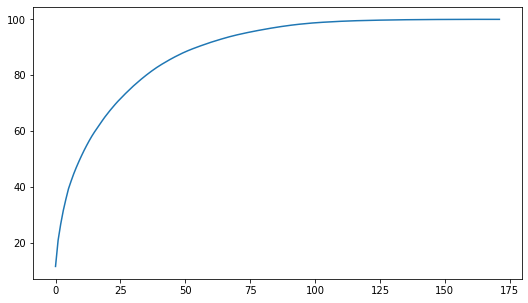

In [208]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

Here the 90% of feature is present in the 60 columns of data

# PCA and Logistic Regression

In [209]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline1 = Pipeline(steps)

In [210]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8133809523809524

In [211]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6630 1639]
 [ 109  623]]
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.9


## Hyperparameter Tuening

In [212]:
pca1 = PCA()

logistic1 = LogisticRegression(class_weight={0:0.1, 1: 0.9})

#create pipeline
steps1 = [("scaler", StandardScaler()), 
         ("pca", pca1),
         ("logistic", logistic1)
        ]

pca_logistic1 = Pipeline(steps1)
# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic1, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [213]:
# fit to the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [214]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.788582,0.715000,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.745357,0.038773,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,2.664008,0.273971,0.074995,0.015303,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.903109,0.891853,0.877908,0.875128,0.882535,0.886107,0.010223,11
3,3.256185,0.100951,0.077149,0.013015,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.906438,0.894918,0.883592,0.875063,0.886529,0.889308,0.010660,8
4,2.055688,0.078552,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5,2.740628,0.070568,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
6,2.700850,0.115691,0.078754,0.021429,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.904186,0.892233,0.878295,0.875135,0.883061,0.886582,0.010526,9
7,3.383299,0.130328,0.068746,0.012499,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906365,0.895297,0.884398,0.874706,0.887741,0.889701,0.010638,1
8,2.131965,0.169970,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
9,2.588676,0.168737,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24


In [215]:
print(model.best_score_)
print(model.best_params_)

0.8897014612163014
{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


## Random Forest

In [216]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest1 = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params1 = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model1 = GridSearchCV(estimator=forest1, cv=folds, param_grid=params1, scoring='roc_auc', n_jobs=-1, verbose=1)

In [217]:
# fit model
model1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [218]:
print(model1.best_score_)
print(model1.best_params_)

0.9279193204096687
{'criterion': 'entropy', 'max_features': 0.4}


### Choosing for the best feature

In [219]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, 
                                  random_state=4, verbose=1)

13


In [220]:
#Fit to the model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [221]:
# OOB score
rf_model.oob_score_

0.944

In [222]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8167  102]
 [ 396  336]]
Sensitivity: 	0.46
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [223]:
# Feature importacne
feature = original_df2_filtered.drop('churn',axis=1).columns
feature

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=172)

In [224]:
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)

In [225]:
feature_importance.variables.head(9)

0         total_ic_mou_8
1         total_og_mou_8
2       loc_ic_t2m_mou_8
3         max_rech_amt_8
4    total_rech_amt_diff
5     last_day_rch_amt_8
6                 arpu_8
7              arpu_diff
8      total_ic_mou_diff
Name: variables, dtype: object

In [232]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'loc_ic_t2m_mou_8', 'max_rech_amt_8', 
                'arpu_diff', 'last_day_rch_amt_8']
X_train1 = X_train[top_features]
X_test1 = X_test[top_features]

In [233]:
# logistic regression
steps2 = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic2 = Pipeline(steps2)

# hyperparameter space
params2 = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model3 = GridSearchCV(estimator=logistic2, cv=folds, param_grid=params2, scoring='roc_auc', n_jobs=-1, verbose=1)

In [234]:
# fit to model
model3.fit(X_train1, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [235]:
print(model3.best_score_)
print(model3.best_params_)

0.8587155534538551
{'logistic__C': 10, 'logistic__penalty': 'l2'}


In [236]:
# predict churn on test data
y_pred = model3.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



[[5780 2489]
 [  95  637]]
Sensitivity: 	0.87
Specificity: 	0.7


## Business Insights

  * Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
  * The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
  * To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.